In [1]:
import tensorflow as tf

2022-04-14 17:32:45.430412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-14 17:32:45.430450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

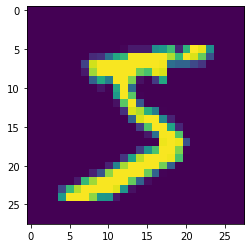

In [4]:
plt.imshow(X_train[0])

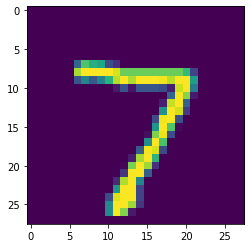

In [5]:
plt.imshow(X_test[0])


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# convert into vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [8]:
# rescale
X_train.max()

255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.max()

1.0

In [10]:
X_train.shape[1]

784

In [11]:
# Model
input_layer = Input(shape = (X_train.shape[1]), name = 'Input')
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input_layer)
output = Dense(X_train.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

2022-04-14 17:33:26.768205: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-14 17:33:26.768267: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-14 17:33:26.768308: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hassanmehmood-HP-Pavilion-dv6-Notebook-PC): /proc/driver/nvidia/version does not exist


In [12]:
autoencoder = Model(input_layer, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [13]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.layers

In [17]:
encoded_layer = Input(shape = (32,), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_layer (InputLayer)  [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.compile(loss = 'mse', optimizer = 'adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size = 128)

2022-04-14 17:42:08.931416: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-04-14 17:42:09.549968: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.0537
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0259
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0185
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0147
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0127
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0115
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0110
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0107
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0105
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 12/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0103
Epoch 13/20
469/469 [====

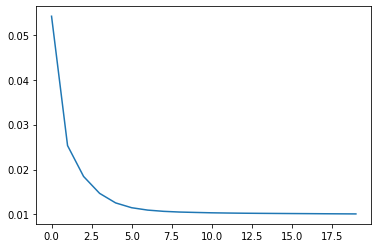

In [17]:
plt.plot(history.history['loss'])

In [22]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

(10000, 32)

In [23]:
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

(10000, 784)

In [24]:
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data.shape

(10000, 28, 28)

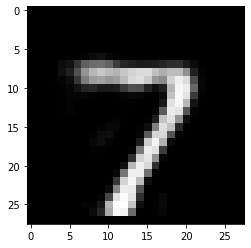

In [25]:
plt.imshow(output_data[0], cmap ='gray')

In [26]:
X_test = X_test.reshape(10000, 28,28)
X_test.shape

(10000, 28, 28)

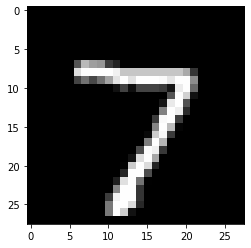

In [27]:
plt.imshow(X_test[0], cmap = 'gray')